# Name - Mallela Vaidehi

# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [539]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [540]:
# Importing the file porter_data_1.csv
porter = pd.read_csv("/Users/vaidehimallela/Downloads/Delivery_Starter/porter_data_1.csv")

In [541]:
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [542]:
porter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [543]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format

porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [544]:
# Convert categorical features to category type

porter['store_primary_category']=porter['store_primary_category'].astype('category')
porter['order_protocol']=porter['order_protocol'].astype('category')


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [545]:
# Calculate time taken in minutes
porter['Time_taken_for_delivery']= (porter['actual_delivery_time']-porter['created_at'])/pd.Timedelta('60s')

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [546]:
# Extract the hour and day of week from the 'created_at' timestamp
porter['hour'] = porter['created_at'].dt.hour
porter['day']  = porter['created_at'].dt.day
# Create a categorical feature 'isWeekend'
porter['isWeekend'] = porter['created_at'].dt.dayofweek >= 5
porter['isWeekend'] = porter['isWeekend'].astype(int)
porter['isWeekend']=porter['isWeekend'].astype('category')

In [547]:
# Drop unnecessary columns

porter_new = porter.drop(columns=['min_item_price','max_item_price'])


In [548]:
porter_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  category      
 4   order_protocol            175777 non-null  category      
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   total_onshift_dashers     175777 non-null  float64       
 9   total_busy_dashers        175777 non-null  float64       
 10  total_outstanding_orders  175777 non-null  float64       
 11  distance                  175777 non-null  float64       
 12  Ti

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [549]:
# Define target variable (y) and features (X)

X = ['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance',
       'hour', 'day', 'isWeekend']

y = ['Time_taken_for_delivery']

porter_new.columns

Index(['market_id', 'created_at', 'actual_delivery_time',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'Time_taken_for_delivery',
       'hour', 'day', 'isWeekend'],
      dtype='object')

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [550]:
# Split data into training and testing sets

df_train, df_test = train_test_split(porter_new, train_size=0.70, random_state=100)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [551]:
# Define numerical and categorical columns for easy EDA and data manipulation

numerical_vars = ['total_items','subtotal','num_distinct_items','total_onshift_dashers','total_busy_dashers', 
                  'total_outstanding_orders','distance','Time_taken_for_delivery']
categorical_vars = ['store_primary_category', 'order_protocol', 'isWeekend']

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

<Figure size 1600x1000 with 0 Axes>

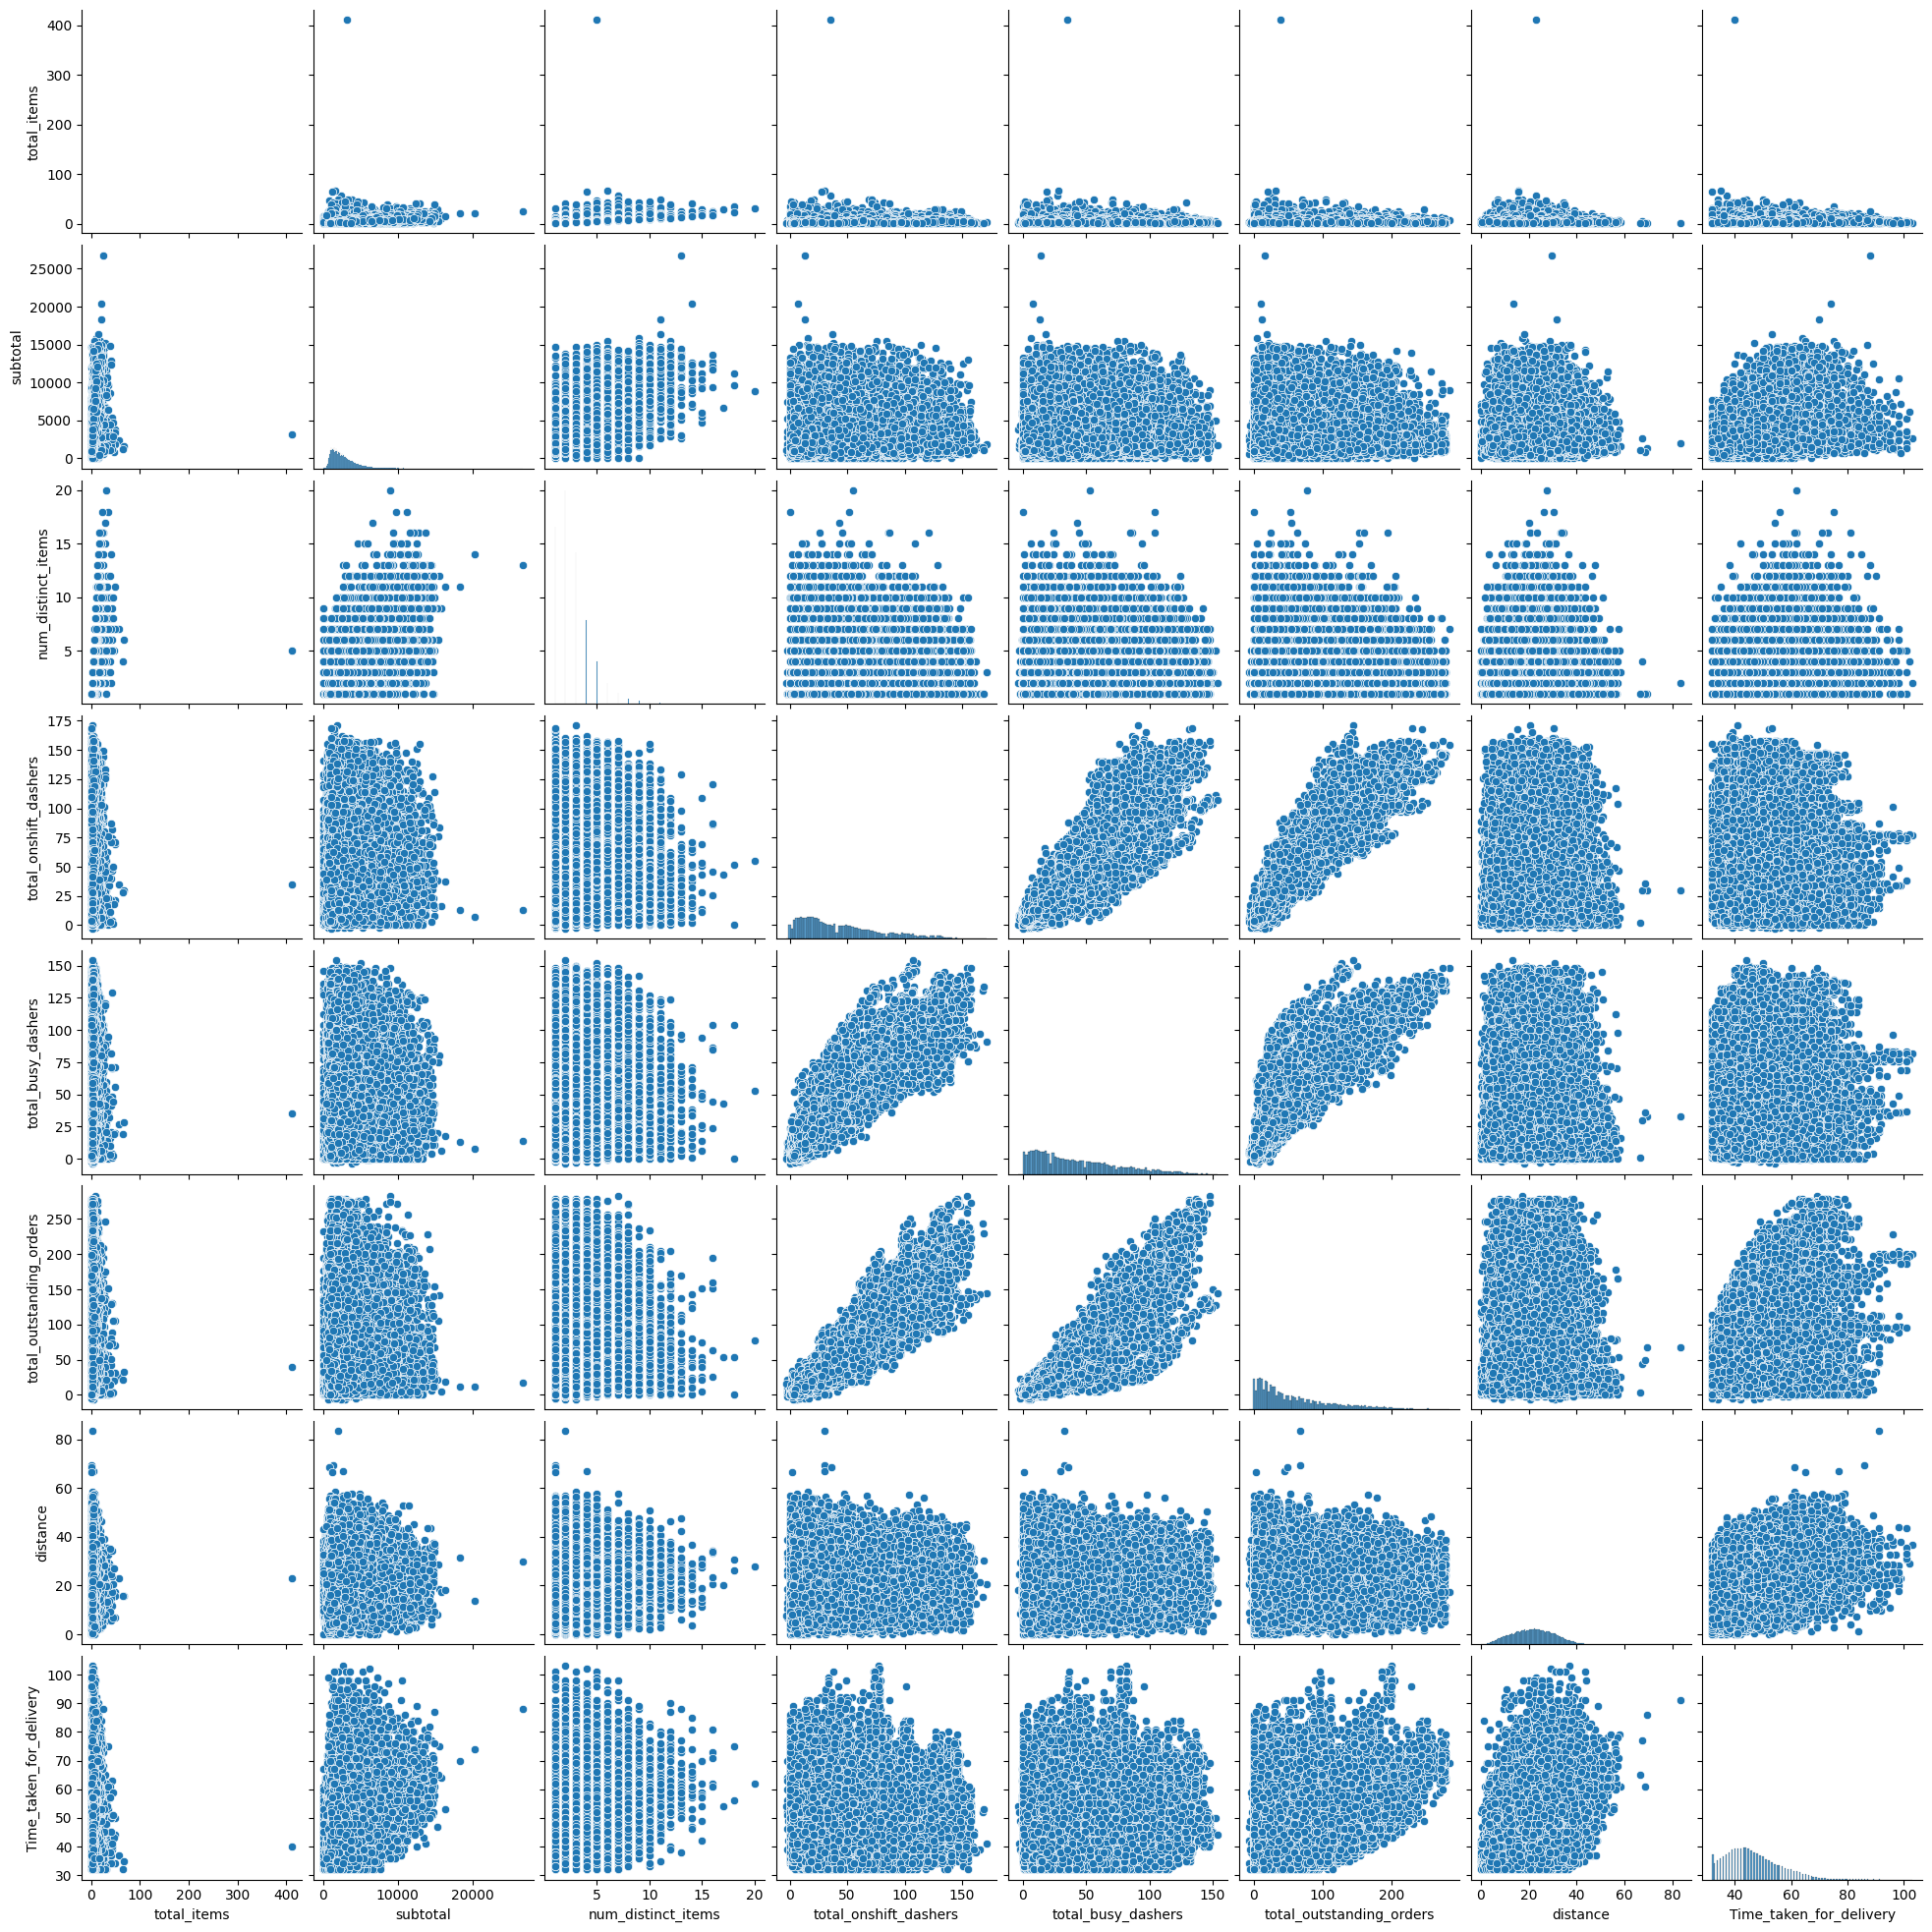

In [552]:
# Plot distributions for all numerical columns
plt.figure(figsize = (16, 10))
sns.pairplot(df_train[numerical_vars])

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

<Axes: xlabel='isWeekend', ylabel='Time_taken_for_delivery'>

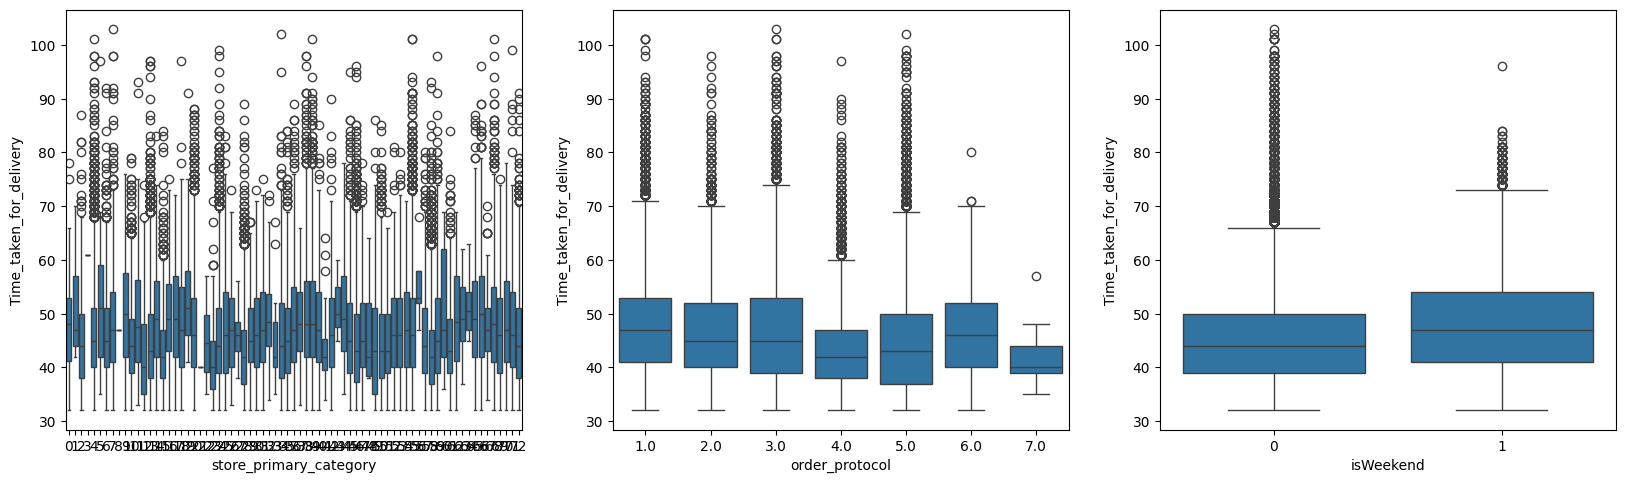

In [553]:
# Distribution of categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'store_primary_category', y = 'Time_taken_for_delivery', data = df_train)
plt.subplot(2,3,2)
sns.boxplot(x = 'order_protocol', y = 'Time_taken_for_delivery', data = df_train)
plt.subplot(2,3,3)
sns.boxplot(x = 'isWeekend', y = 'Time_taken_for_delivery', data = df_train)

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: ylabel='Time_taken_for_delivery'>

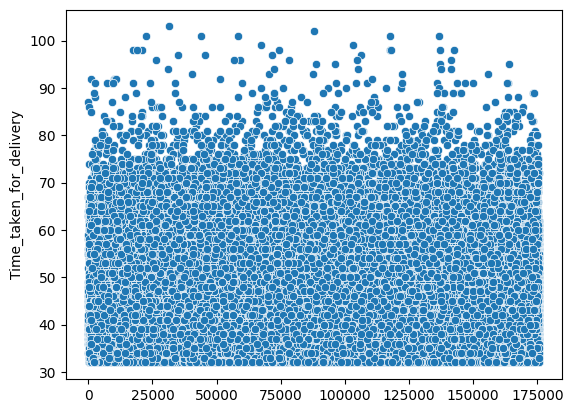

In [554]:
# Distribution of time_taken

sns.scatterplot(df_train['Time_taken_for_delivery'])

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

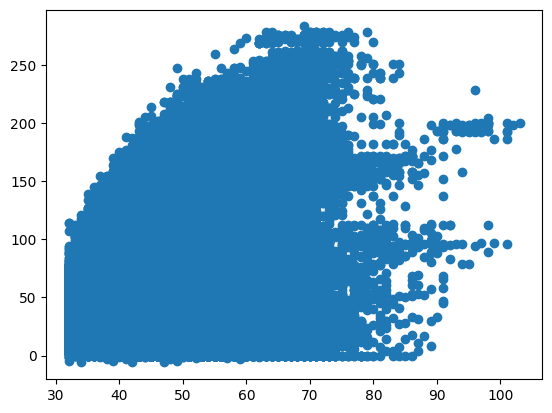

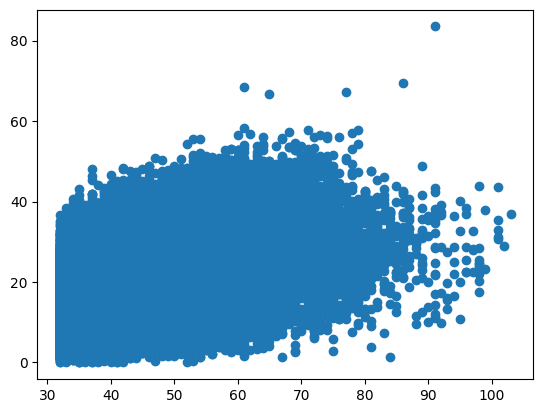

In [555]:
# Scatter plot to visualise the relationship between time_taken and other features

plt.scatter(df_train['Time_taken_for_delivery'],df_train['total_outstanding_orders'])
plt.show()

plt.scatter(df_train['Time_taken_for_delivery'],df_train['distance'])
plt.show()

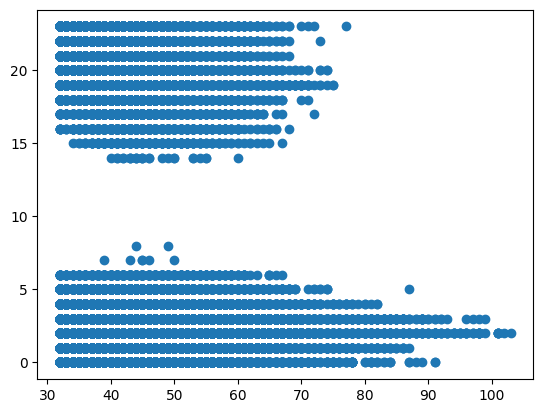

In [556]:
# Show the distribution of time_taken for different hours
plt.scatter(df_train['Time_taken_for_delivery'],df_train['hour'])
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

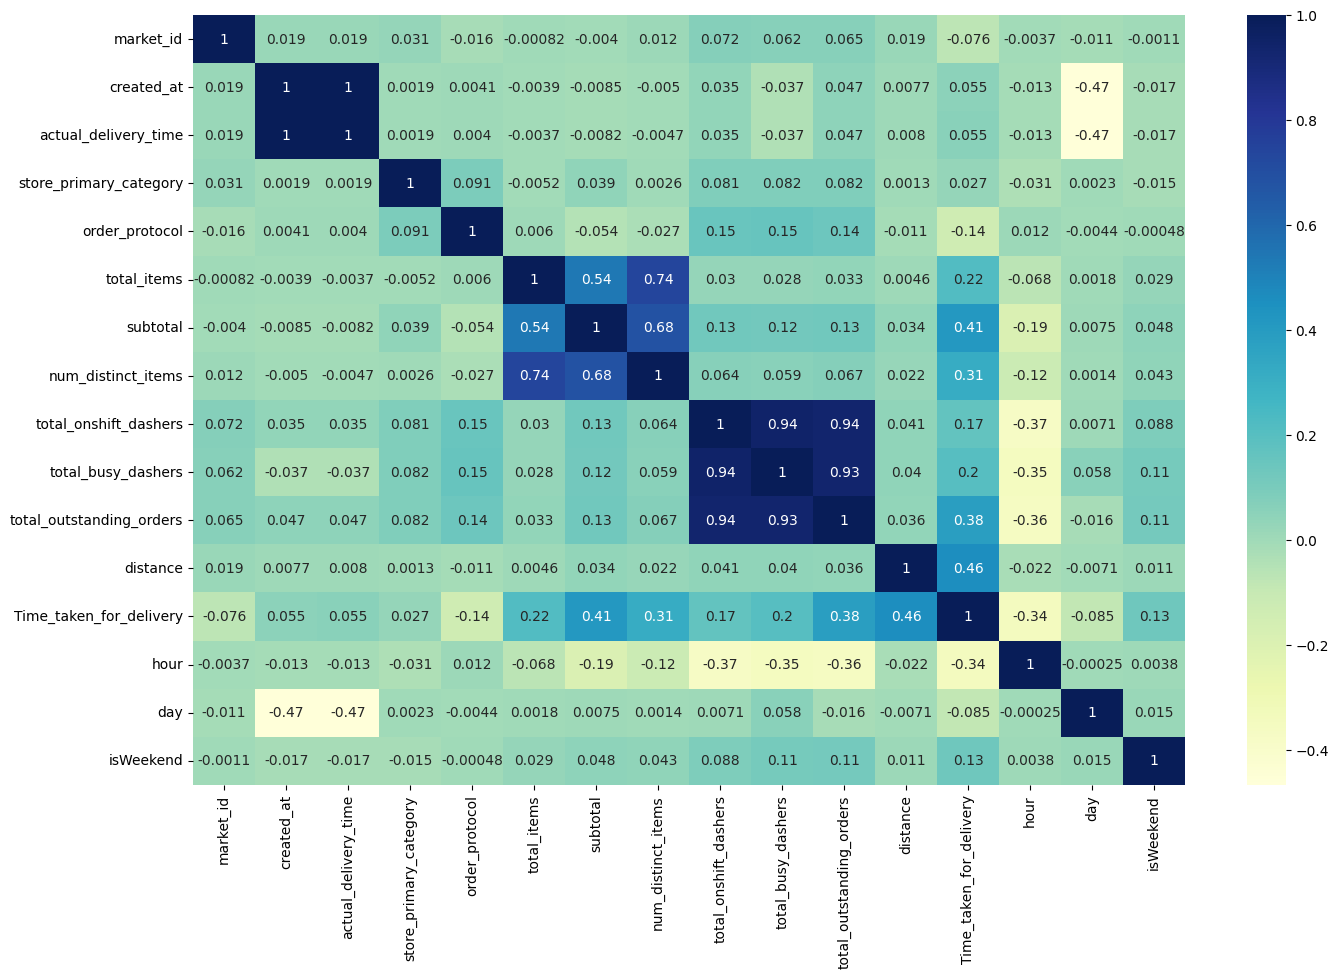

In [557]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## time_taken has good correlation with distance, hour, total_outstanding_orders, sub_total, num_distinct_items

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [558]:
# Drop 3-5 weakly correlated columns from training dataset
# market_id, created_at, store_primary_category, order_protocol, total_onshift_dashers -- has weak correlation
df_train.drop(columns=['market_id', 'created_at', 'store_primary_category', 'order_protocol', 'total_onshift_dashers'])

actual_delivery_time  total_items  subtotal  num_distinct_items  \
94746   2015-02-09 19:16:15            2      1790                   2   
173338  2015-02-07 02:41:46            1       845                   1   
37592   2015-02-16 00:15:57            1      1900                   1   
42763   2015-01-31 02:11:15            6       463                   3   
27506   2015-02-07 06:21:04            3      3500                   3   
...                     ...          ...       ...                 ...   
82270   2015-02-12 21:23:06            1       895                   1   
65615   2015-02-15 23:55:08            7      3894                   6   
77655   2015-02-03 05:43:05           17       448                   3   
56088   2015-02-06 19:59:50            2      3000                   2   
38408   2015-01-27 01:20:41            2      3750                   2   

        total_busy_dashers  total_outstanding_orders  distance  \
94746                  9.0                      15.0     18.04   
173338                76.0                     136.0     24.28   
37592                 21.0                      28.0     28.24   
42763                 87.0                     129.0     13.88   
27506                 13.0                      17.0      8.00   
...                    ...                       ...       ...   
82270                  2.0                       1.0     16.16   
65615                 60.0                      64.0     22.64   
77655                 43.0                      50.0     20.64   
56088                 43.0                      63.0     21.64   
38408                 59.0                      36.0     27.24   

        Time_taken_for_delivery  hour  day isWeekend  
94746                      41.0    18    9         0  
173338                     41.0     2    7         1  
37592                      44.0    23   15         1  
42763                      40.0     1   31         1  
27506                      44.0     5    7         1  
...                         ...   ...  ...       ...  
82270                      37.0    20   12         0  
65615                      36.0    23   15         1  
77655                      36.0     5    3         0  
56088                      44.0    19    6         0  
38408                      42.0     0   27         0  

[123043 rows x 11 columns]

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

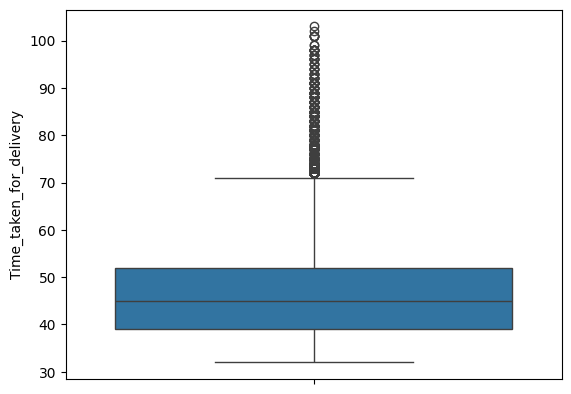

None


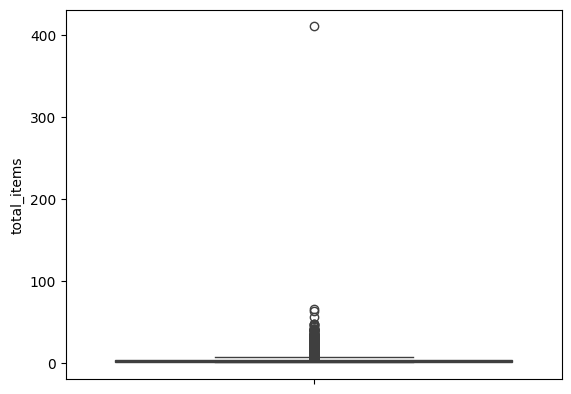

None


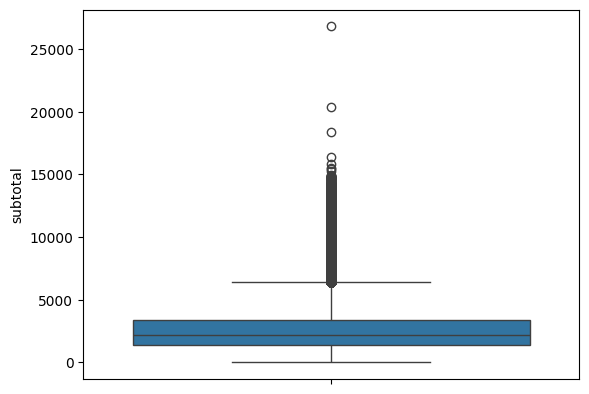

None


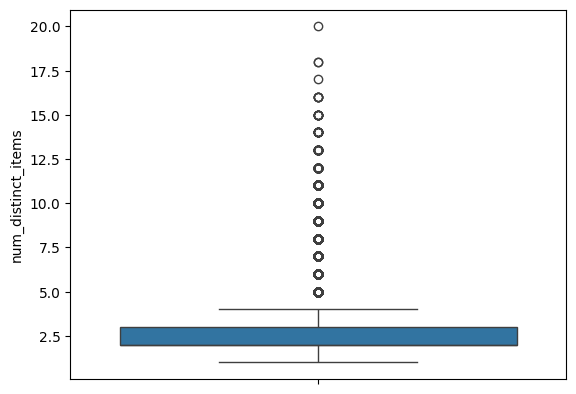

None


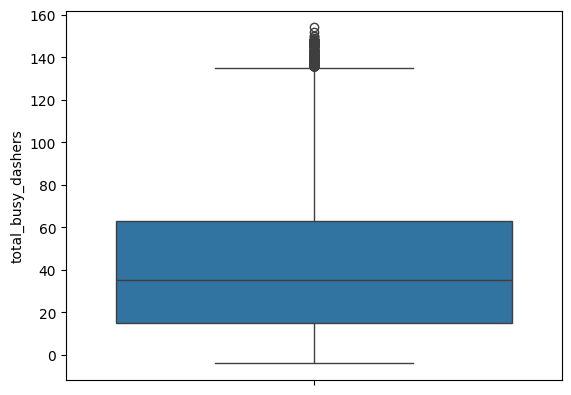

None


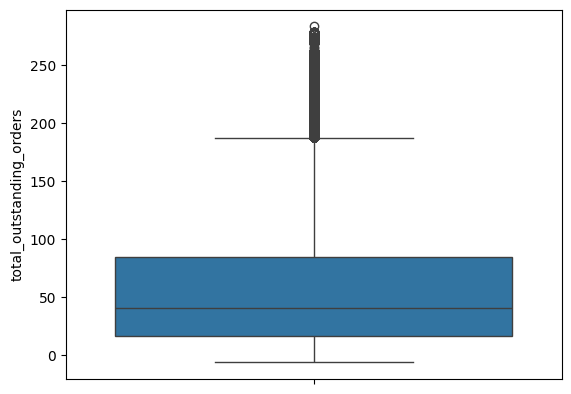

None


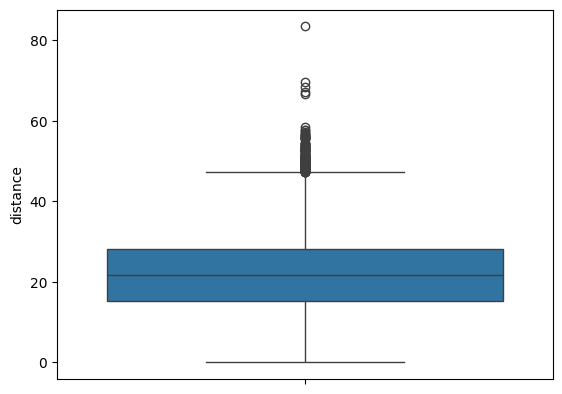

None


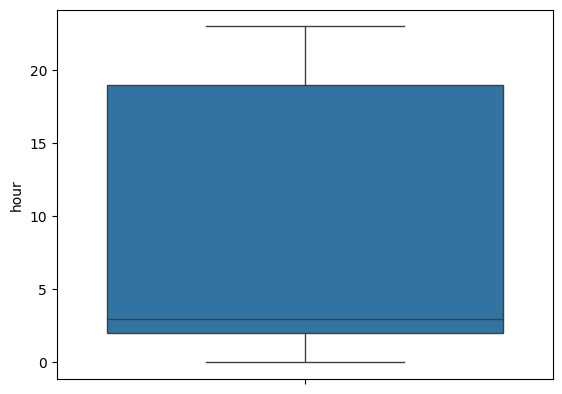

None


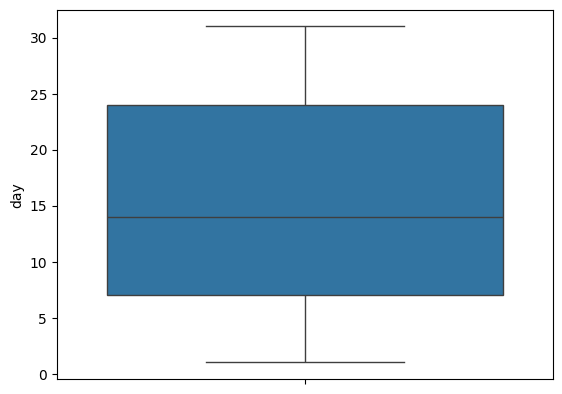

None


In [559]:
# Boxplot for time_taken

sns.boxplot(df_train['Time_taken_for_delivery'])
print(plt.show())

sns.boxplot(df_train['total_items'])
print(plt.show())

sns.boxplot(df_train['subtotal'])
print(plt.show())

sns.boxplot(df_train['num_distinct_items'])
print(plt.show())

sns.boxplot(df_train['total_busy_dashers'])
print(plt.show())

sns.boxplot(df_train['total_outstanding_orders'])
print(plt.show())

sns.boxplot(df_train['distance'])
print(plt.show())

sns.boxplot(df_train['hour'])
print(plt.show())

sns.boxplot(df_train['day'])
print(plt.show())

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [560]:
# Handle outliers
col_list = ['total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
            'hour','day']
for col in col_list:
    Q1 = df_train[col].quantile(0.25)
    Q3 = df_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    drop_index = df_train[(df_train[col] < lower_bound) | (df_train[col] > upper_bound)].index
    df_train.drop(drop_index , inplace=True)

In [561]:
df_train = df_train.reset_index()

In [562]:
df_train.head()

index  market_id          created_at actual_delivery_time  \
0   94746        4.0 2015-02-09 18:35:15  2015-02-09 19:16:15   
1  173338        4.0 2015-02-07 02:00:46  2015-02-07 02:41:46   
2   37592        4.0 2015-02-15 23:31:57  2015-02-16 00:15:57   
3   42763        2.0 2015-01-31 01:31:15  2015-01-31 02:11:15   
4   27506        2.0 2015-02-07 05:37:04  2015-02-07 06:21:04   

  store_primary_category order_protocol  total_items  subtotal  \
0                     24            5.0            2      1790   
1                     72            5.0            1       845   
2                     55            5.0            1      1900   
3                     28            4.0            6       463   
4                     72            1.0            3      3500   

   num_distinct_items  total_onshift_dashers  total_busy_dashers  \
0                   2                   10.0                 9.0   
1                   1                  134.0                76.0   
2                   1                   21.0                21.0   
3                   3                   98.0                87.0   
4                   3                    7.0                13.0   

   total_outstanding_orders  distance  Time_taken_for_delivery  hour  day  \
0                      15.0     18.04                     41.0    18    9   
1                     136.0     24.28                     41.0     2    7   
2                      28.0     28.24                     44.0    23   15   
3                     129.0     13.88                     40.0     1   31   
4                      17.0      8.00                     44.0     5    7   

  isWeekend  
0         0  
1         1  
2         1  
3         1  
4         1

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [563]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = ['total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
            'hour','day']
categorical_cols = ['isWeekend']


#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

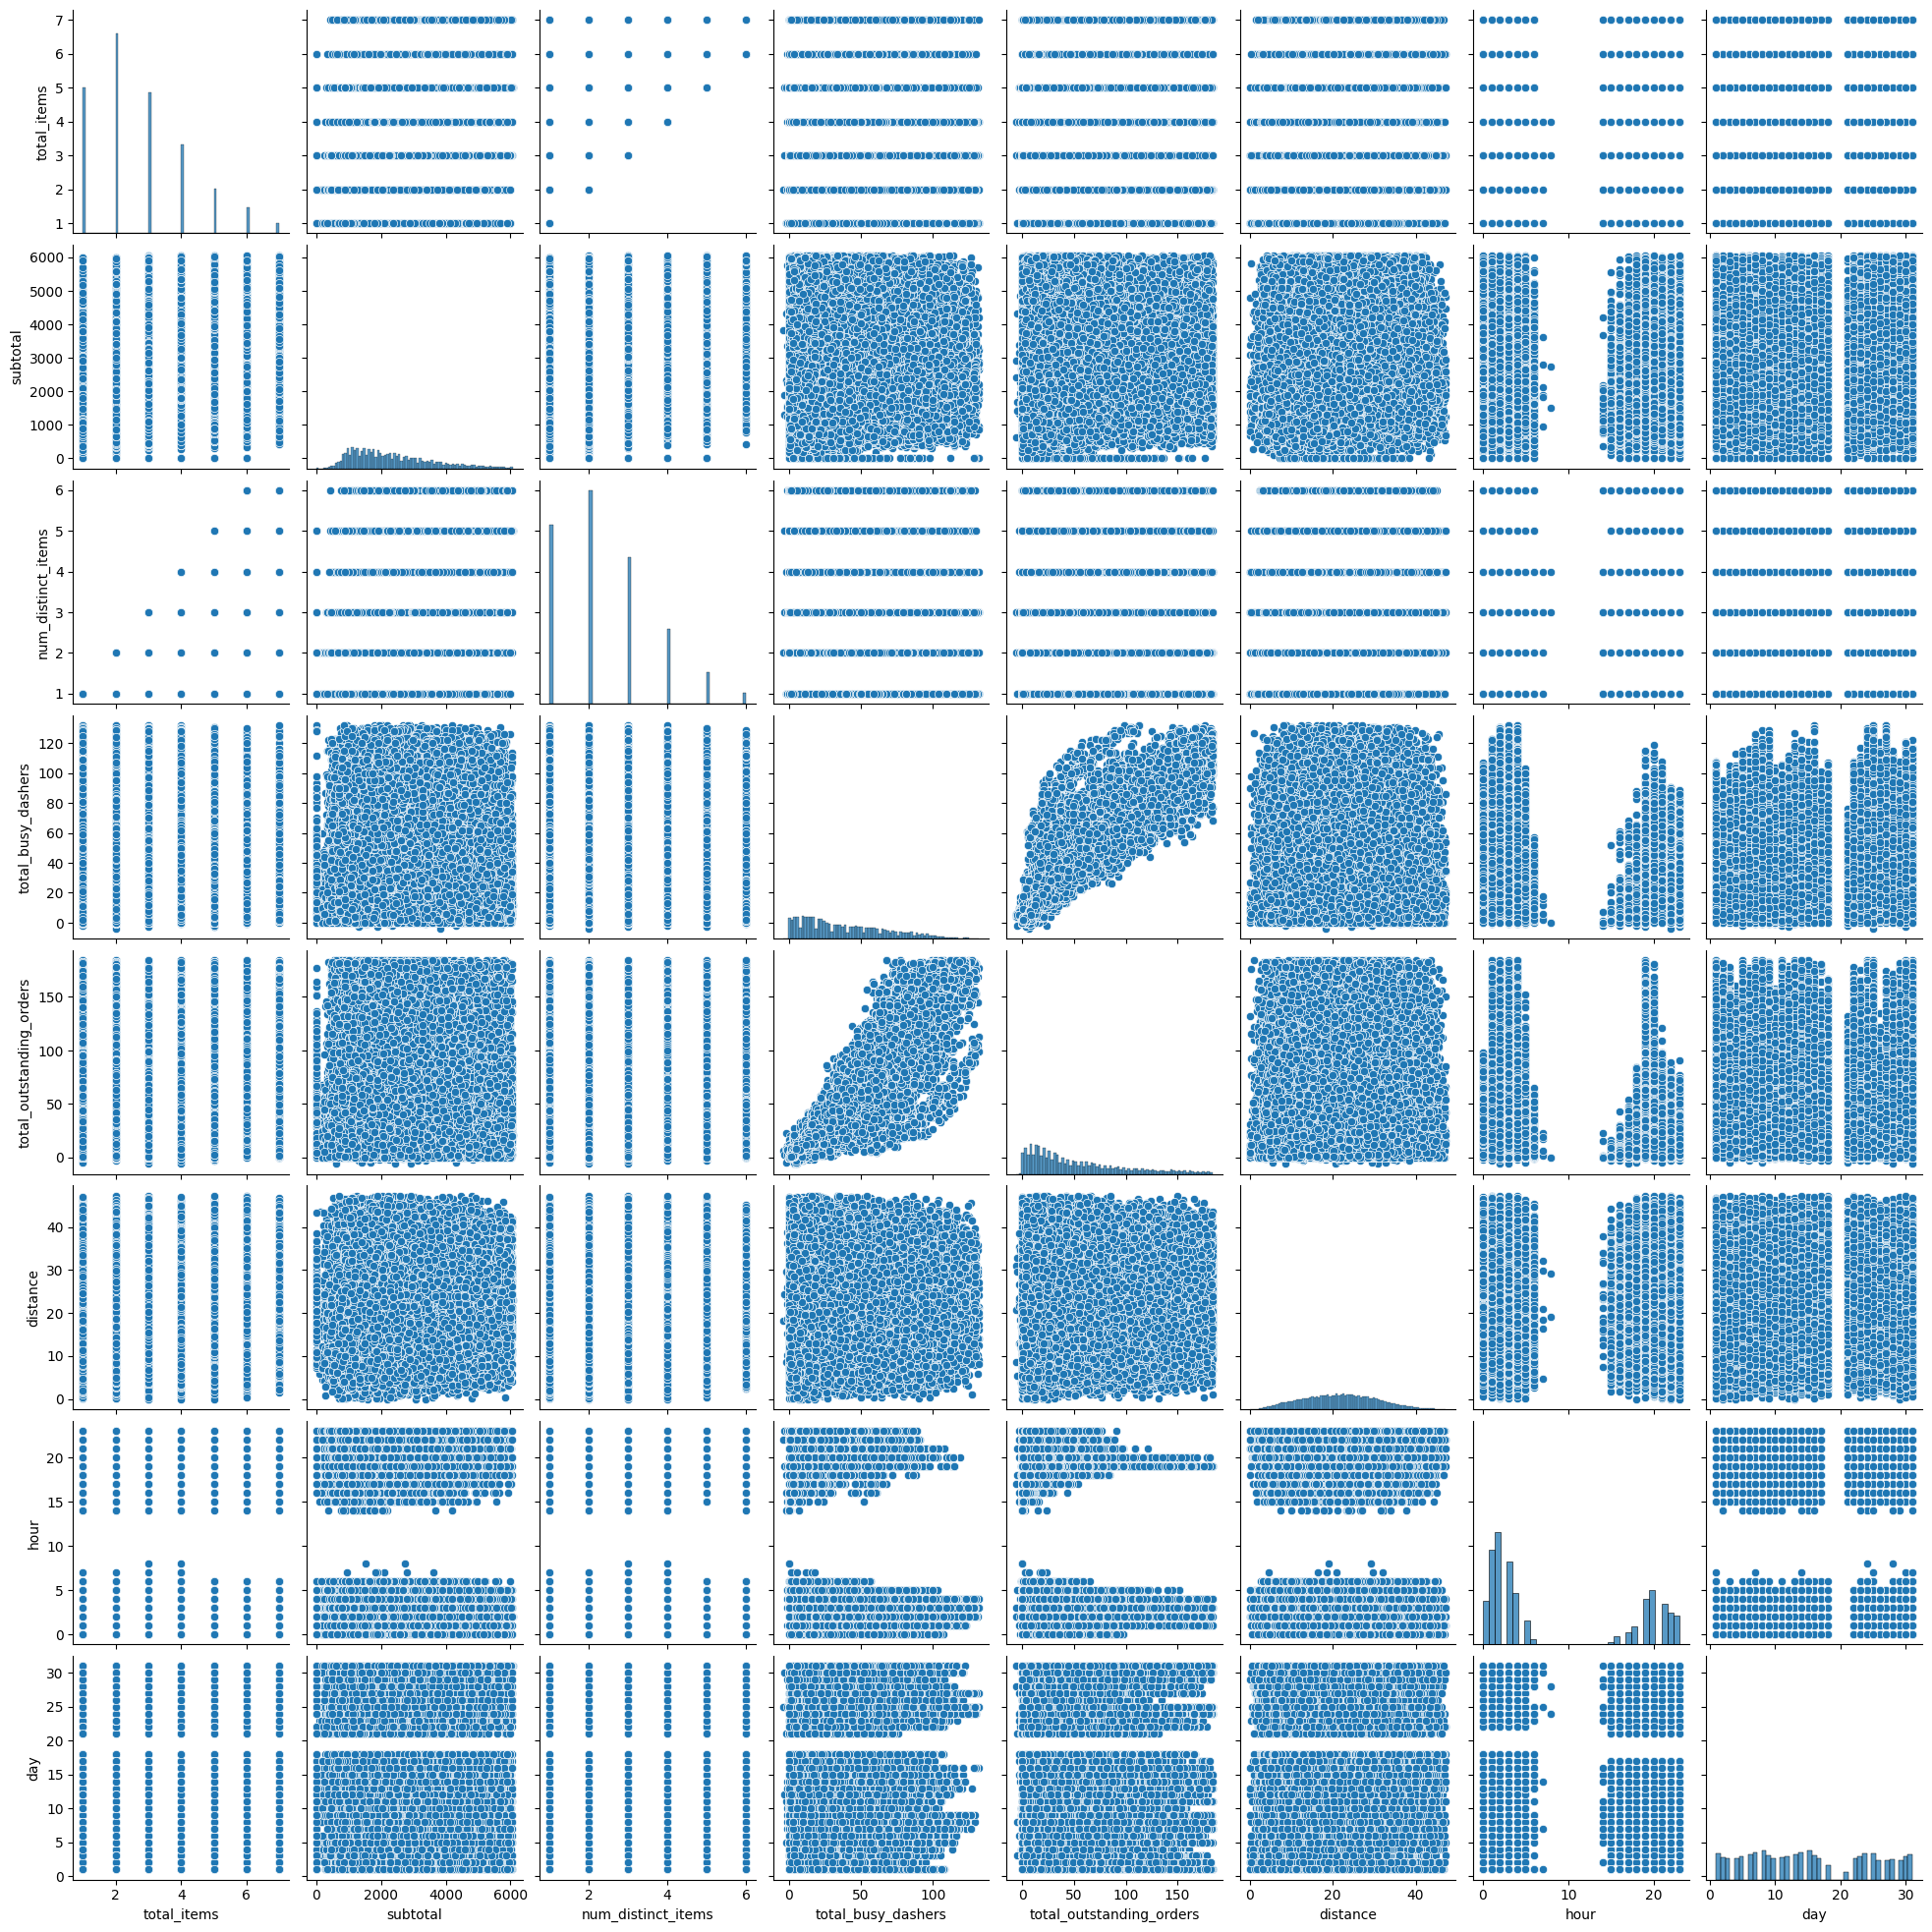

In [564]:
# Plot distributions for all numerical columns

sns.pairplot(df_train,vars=['total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
            'hour','day'])

##### **4.1.2**
Check the distribution of categorical features

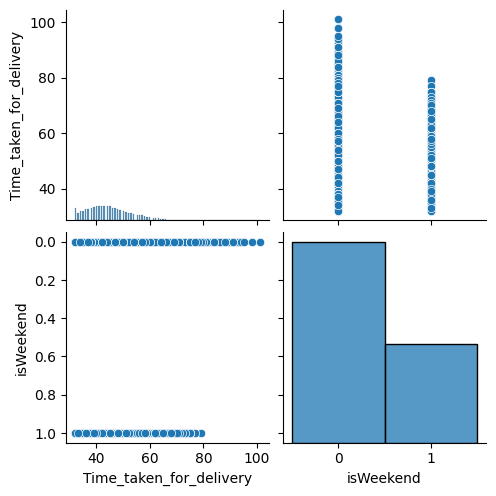

In [565]:
# Distribution of categorical columns

sns.pairplot(df_train,vars=['Time_taken_for_delivery','isWeekend'])

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

<Axes: ylabel='Time_taken_for_delivery'>

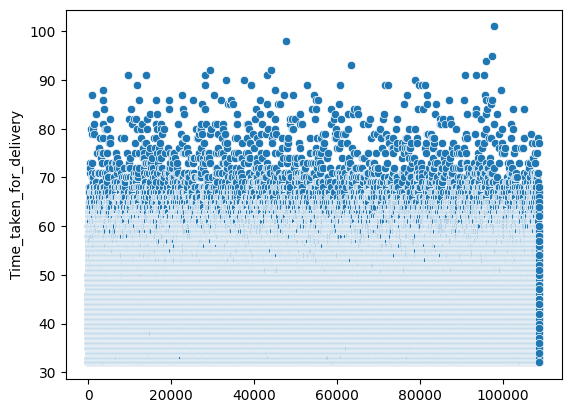

In [566]:
# Distribution of time_taken

sns.scatterplot(df_train['Time_taken_for_delivery'])

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

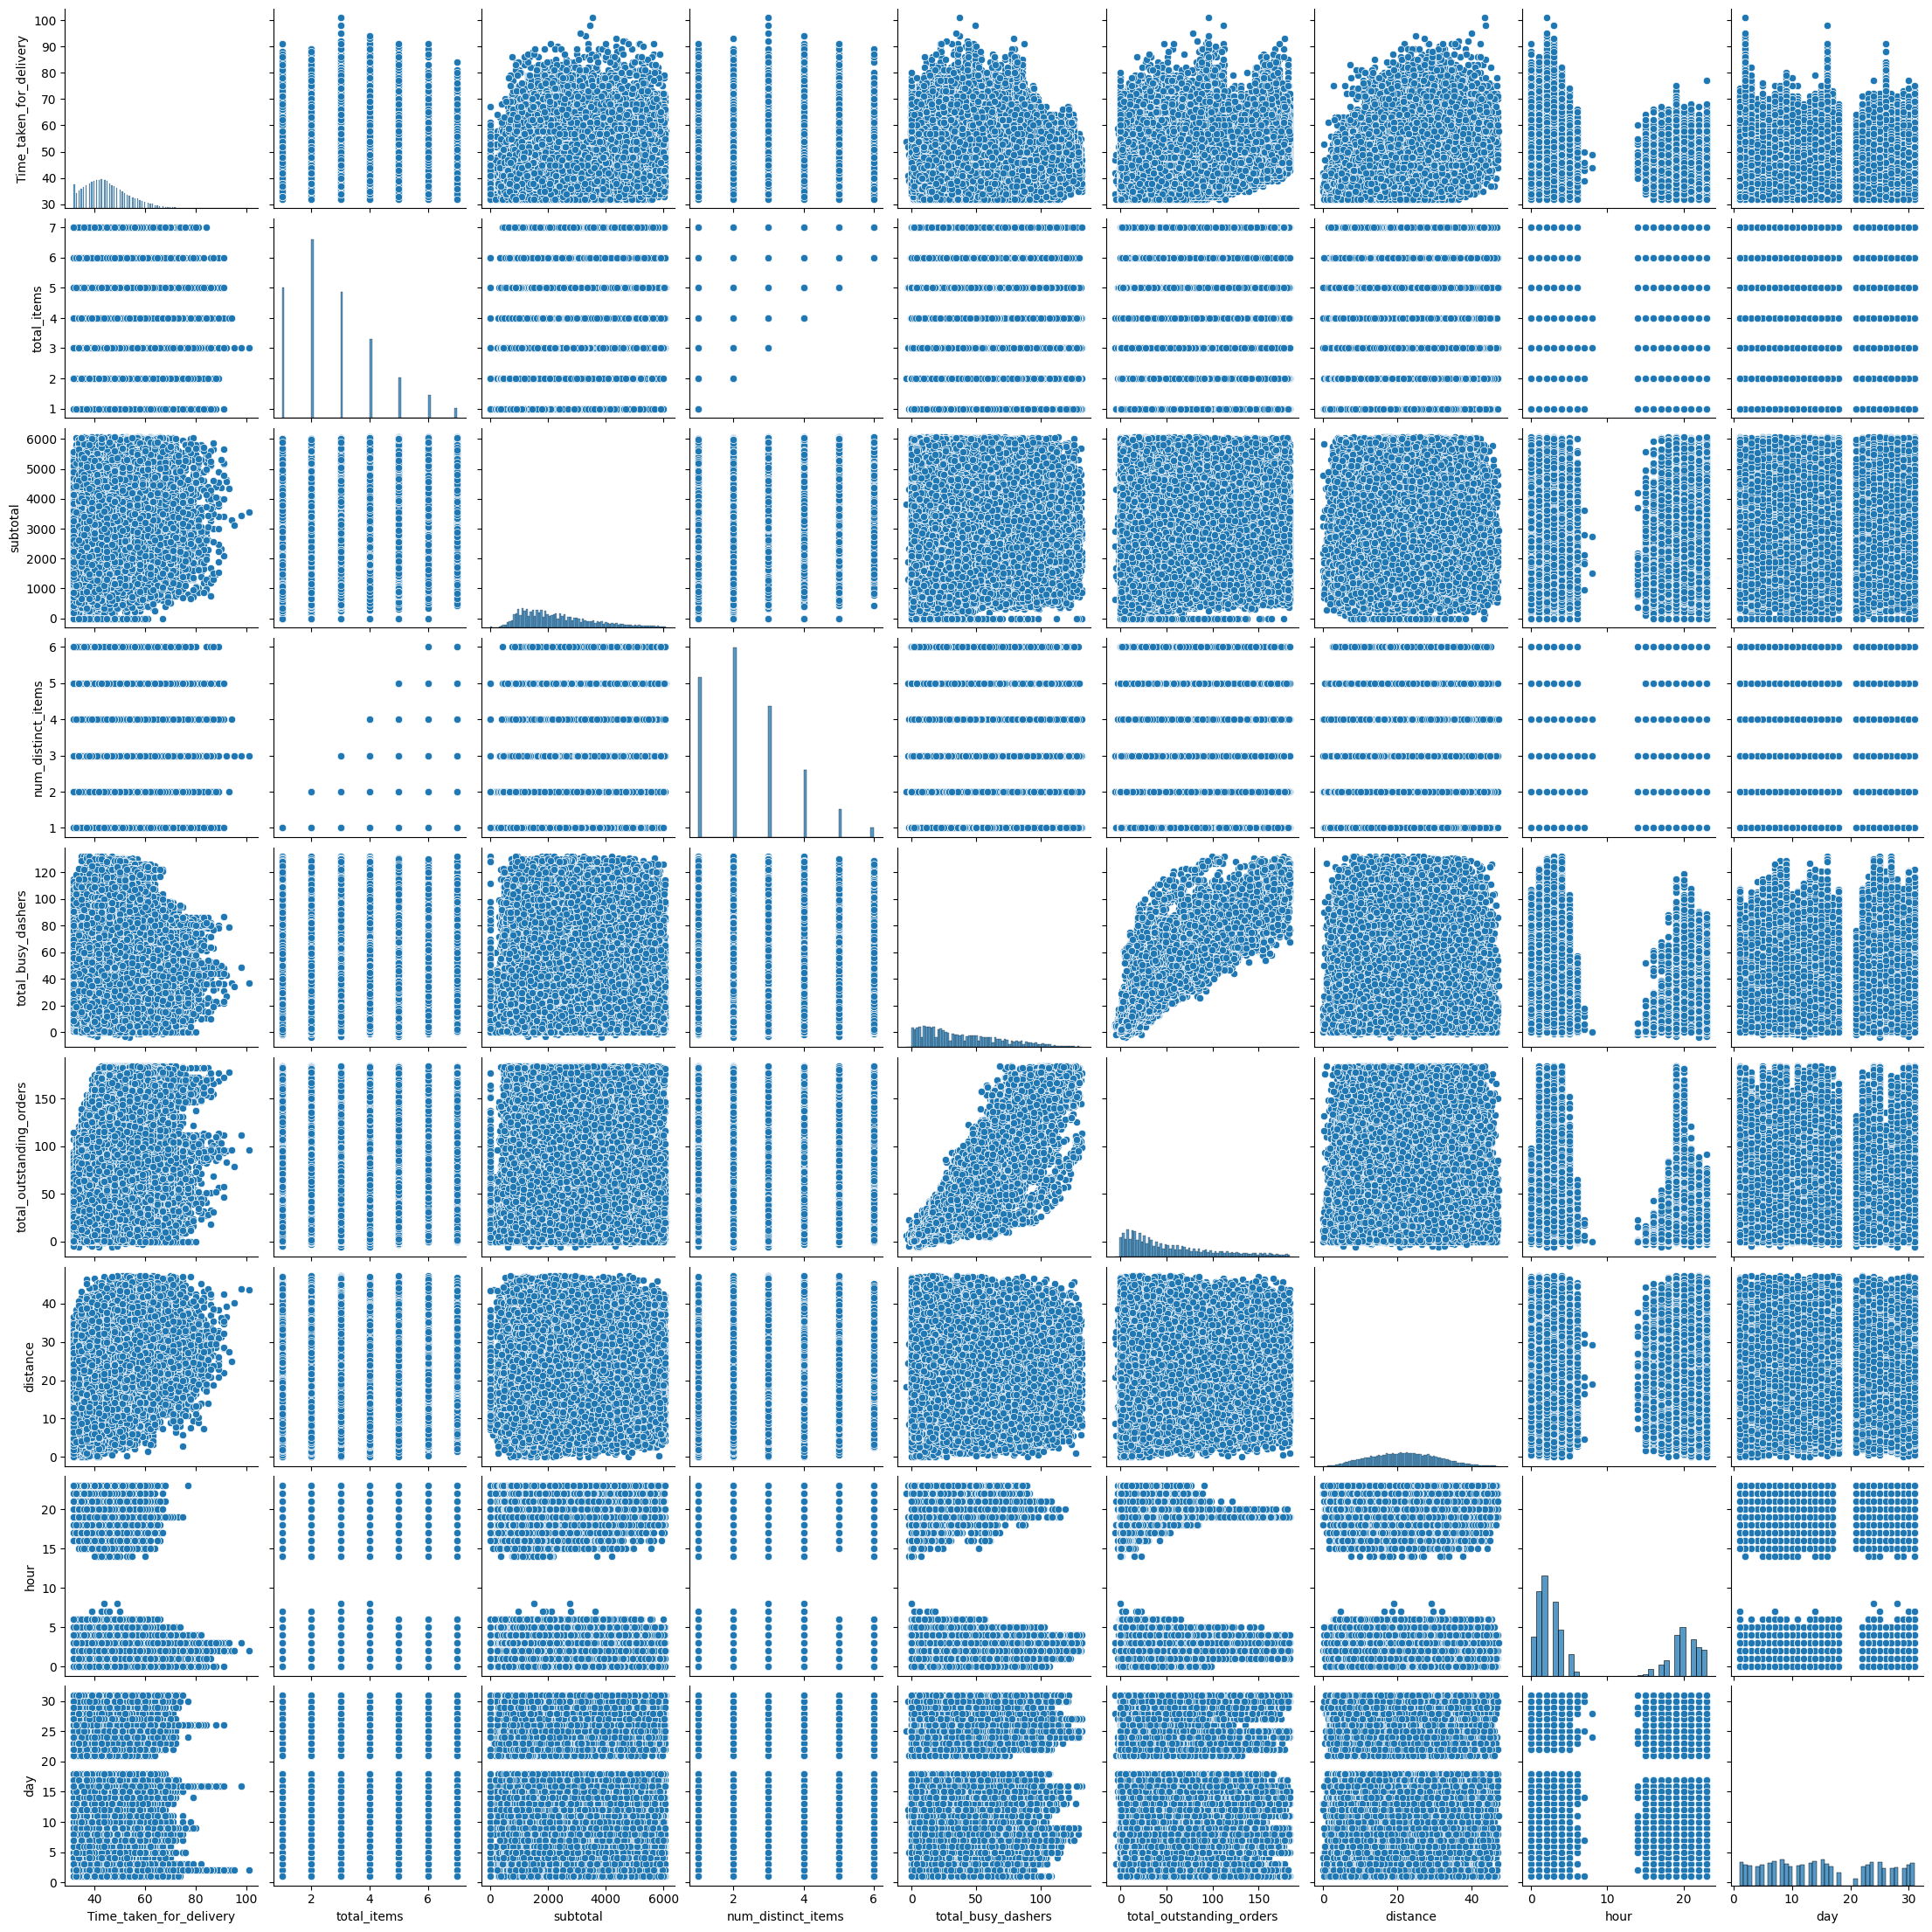

In [567]:
# Scatter plot to visualise the relationship between time_taken and other features

sns.pairplot(df_train,vars=['Time_taken_for_delivery','total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
            'hour','day'])

#### **4.3** Drop the columns with weak correlations with the target variable

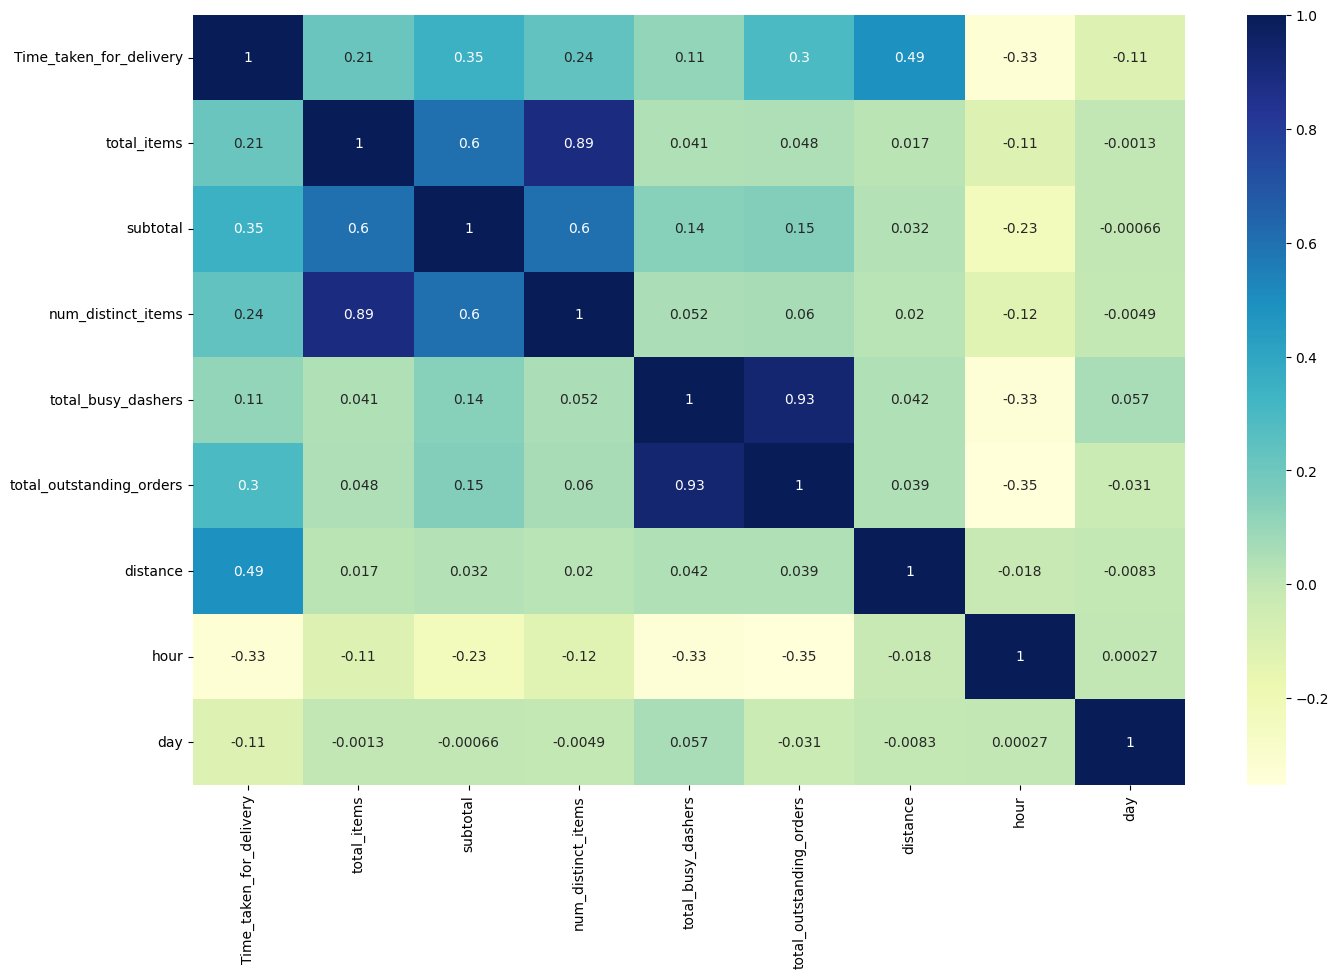

In [568]:
df_train = df_train[['Time_taken_for_delivery','total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
            'hour','day']]
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [569]:
# Drop the weakly correlated columns from training dataset
# day is weakly correlated. Therefore dropping it

df_train = df_train.drop('day', axis = 1)


In [570]:
df_train

Time_taken_for_delivery  total_items  subtotal  num_distinct_items  \
0                          41.0            2      1790                   2   
1                          41.0            1       845                   1   
2                          44.0            1      1900                   1   
3                          40.0            6       463                   3   
4                          44.0            3      3500                   3   
...                         ...          ...       ...                 ...   
108739                     45.0            3      2245                   3   
108740                     37.0            1       895                   1   
108741                     36.0            7      3894                   6   
108742                     44.0            2      3000                   2   
108743                     42.0            2      3750                   2   

        total_busy_dashers  total_outstanding_orders  distance  hour  
0                      9.0                      15.0     18.04    18  
1                     76.0                     136.0     24.28     2  
2                     21.0                      28.0     28.24    23  
3                     87.0                     129.0     13.88     1  
4                     13.0                      17.0      8.00     5  
...                    ...                       ...       ...   ...  
108739                28.0                      27.0     35.80    23  
108740                 2.0                       1.0     16.16    20  
108741                60.0                      64.0     22.64    23  
108742                43.0                      63.0     21.64    19  
108743                59.0                      36.0     27.24     0  

[108744 rows x 8 columns]

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [571]:
# Import libraries

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import scipy.stats as stats

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [572]:
# Apply scaling to the numerical columns

#Applying scaling to the training set numerical columns

scaler = MinMaxScaler()
#create a list of num vars
num_vars = ['Time_taken_for_delivery','total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
            'hour']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [573]:
df_train.head()

Time_taken_for_delivery  total_items  subtotal  num_distinct_items  \
0                 0.130435     0.166667  0.295039                 0.2   
1                 0.130435     0.000000  0.139278                 0.0   
2                 0.173913     0.000000  0.313170                 0.0   
3                 0.115942     0.833333  0.076314                 0.4   
4                 0.173913     0.333333  0.576891                 0.4   

   total_busy_dashers  total_outstanding_orders  distance      hour  
0            0.095588                  0.110526  0.381557  0.782609  
1            0.588235                  0.747368  0.513536  0.086957  
2            0.183824                  0.178947  0.597293  1.000000  
3            0.669118                  0.710526  0.293570  0.043478  
4            0.125000                  0.121053  0.169205  0.217391

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [574]:
y_train = df_train.pop('Time_taken_for_delivery')
X_train = df_train

In [575]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train)

lr = sm.OLS(y_train,X_train_sm)


In [576]:
# Train the model using the training data
#fit

lr_model = lr.fit()

lr_model.params

const                       0.017986
total_items                -0.024487
subtotal                    0.148265
num_distinct_items          0.042416
total_busy_dashers         -0.708503
total_outstanding_orders    0.680232
distance                    0.323263
hour                       -0.067733
dtype: float64

In [577]:
X_train_sm

const  total_items  subtotal  num_distinct_items  total_busy_dashers  \
0         1.0     0.166667  0.295039                 0.2            0.095588   
1         1.0     0.000000  0.139278                 0.0            0.588235   
2         1.0     0.000000  0.313170                 0.0            0.183824   
3         1.0     0.833333  0.076314                 0.4            0.669118   
4         1.0     0.333333  0.576891                 0.4            0.125000   
...       ...          ...       ...                 ...                 ...   
108739    1.0     0.333333  0.370035                 0.4            0.235294   
108740    1.0     0.000000  0.147519                 0.0            0.044118   
108741    1.0     1.000000  0.641833                 1.0            0.470588   
108742    1.0     0.166667  0.494478                 0.2            0.345588   
108743    1.0     0.166667  0.618098                 0.2            0.463235   

        total_outstanding_orders  distance      hour  
0                       0.110526  0.381557  0.782609  
1                       0.747368  0.513536  0.086957  
2                       0.178947  0.597293  1.000000  
3                       0.710526  0.293570  0.043478  
4                       0.121053  0.169205  0.217391  
...                          ...       ...       ...  
108739                  0.173684  0.757191  1.000000  
108740                  0.036842  0.341794  0.869565  
108741                  0.368421  0.478849  1.000000  
108742                  0.363158  0.457699  0.826087  
108743                  0.221053  0.576142  0.000000  

[108744 rows x 8 columns]

In [578]:
# Train the model using the training data
#fit

lr_model = lr.fit()

lr_model.params

const                       0.017986
total_items                -0.024487
subtotal                    0.148265
num_distinct_items          0.042416
total_busy_dashers         -0.708503
total_outstanding_orders    0.680232
distance                    0.323263
hour                       -0.067733
dtype: float64

In [579]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Time_taken_for_delivery   R-squared:                       0.653
Model:                                 OLS   Adj. R-squared:                  0.653
Method:                      Least Squares   F-statistic:                 2.918e+04
Date:                     Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                             09:17:31   Log-Likelihood:             1.3000e+05
No. Observations:                   108744   AIC:                        -2.600e+05
Df Residuals:                       108736   BIC:                        -2.599e+05
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.0180      0.001     20.497      0.000       0.016       0.020
total_items                 -0.0245      0.002    -12.228      0.000      -0.028      -0.021
subtotal                     0.1483      0.001    104.239      0.000       0.145       0.151
num_distinct_items           0.0424      0.002     21.298      0.000       0.039       0.046
total_busy_dashers          -0.7085      0.003   -257.617      0.000      -0.714      -0.703
total_outstanding_orders     0.6802      0.003    271.726      0.000       0.675       0.685
distance                     0.3233      0.001    266.957      0.000       0.321       0.326
hour                        -0.0677      0.001   -107.010      0.000      -0.069      -0.066
==============================================================================
Omnibus:                     7933.676   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18923.322
Skew:                           0.453   Prob(JB):                         0.00
Kurtosis:                       4.832   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [580]:
# Make predictions

#first scale the test dataset
#df_test = df_test[['Time_taken_for_delivery','total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
#            'hour']]
num_vars = ['Time_taken_for_delivery','total_items','subtotal','num_distinct_items','total_busy_dashers','total_outstanding_orders','distance',
            'hour']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [581]:
y_test = df_test.pop('Time_taken_for_delivery')
X_test = df_test

In [582]:
y_test

139667    0.101449
80077     0.144928
41872     0.231884
165269    0.333333
151215    0.072464
            ...   
46607     0.260870
159653    0.115942
78090     0.057971
98746     0.434783
3735      0.246377
Name: Time_taken_for_delivery, Length: 52734, dtype: float64

In [583]:
#Add constant

X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

const  market_id          created_at actual_delivery_time  \
139667    1.0        1.0 2015-01-23 03:55:26  2015-01-23 04:34:26   
80077     1.0        1.0 2015-01-24 01:39:58  2015-01-24 02:21:58   
41872     1.0        1.0 2015-01-29 03:12:59  2015-01-29 04:00:59   
165269    1.0        4.0 2015-01-24 03:16:13  2015-01-24 04:11:13   
151215    1.0        4.0 2015-02-07 22:25:49  2015-02-07 23:02:49   

       store_primary_category order_protocol  total_items  subtotal  \
139667                     45            1.0     0.333333  0.213450   
80077                       4            1.0     0.166667  0.486237   
41872                      46            4.0     0.000000  0.229932   
165269                     24            5.0     0.166667  0.489039   
151215                      6            2.0     0.333333  0.206033   

        num_distinct_items  total_onshift_dashers  total_busy_dashers  \
139667                 0.2                   59.0            0.463235   
80077                  0.0                   18.0            0.154412   
41872                  0.0                   28.0            0.227941   
165269                 0.2                  124.0            0.963235   
151215                 0.2                   39.0            0.250000   

        total_outstanding_orders  distance      hour  day isWeekend  
139667                  0.352632  0.434856  0.130435   23         0  
80077                   0.115789  0.271574  0.043478   24         1  
41872                   0.268421  0.355330  0.130435   29         0  
165269                  1.084211  0.401861  0.130435   24         1  
151215                  0.205263  0.565144  0.956522    7         1

In [584]:
X_test_sm = X_test_sm.drop(['market_id','created_at','store_primary_category','total_onshift_dashers','day',
                           'order_protocol','actual_delivery_time','isWeekend'],axis=1)


In [585]:
X_test_sm

const  total_items  subtotal  num_distinct_items  total_busy_dashers  \
139667    1.0     0.333333  0.213450                 0.2            0.463235   
80077     1.0     0.166667  0.486237                 0.0            0.154412   
41872     1.0     0.000000  0.229932                 0.0            0.227941   
165269    1.0     0.166667  0.489039                 0.2            0.963235   
151215    1.0     0.333333  0.206033                 0.2            0.250000   
...       ...          ...       ...                 ...                 ...   
46607     1.0     1.166667  1.032306                 1.2            0.544118   
159653    1.0     0.333333  0.393110                 0.4            0.360294   
78090     1.0     0.166667  0.185924                 0.2            0.500000   
98746     1.0     0.666667  0.543267                 0.8            0.661765   
3735      1.0     0.333333  0.345311                 0.0            0.147059   

        total_outstanding_orders  distance      hour  
139667                  0.352632  0.434856  0.130435  
80077                   0.115789  0.271574  0.043478  
41872                   0.268421  0.355330  0.130435  
165269                  1.084211  0.401861  0.130435  
151215                  0.205263  0.565144  0.956522  
...                          ...       ...       ...  
46607                   0.526316  0.560914  0.130435  
159653                  0.268421  0.501692  0.130435  
78090                   0.378947  0.640440  0.913043  
98746                   0.842105  0.413706  0.173913  
3735                    0.121053  0.670051  0.086957  

[52734 rows x 8 columns]

In [586]:
y_test_pred = lr_model.predict(X_test_sm)

In [587]:
y_test_pred

139667    0.093360
80077     0.140204
41872     0.179199
165269    0.271028
151215    0.129257
            ...   
46607     0.338368
159653    0.165737
78090     0.098662
98746     0.342063
3735      0.249886
Length: 52734, dtype: float64

In [588]:
# Find results for evaluation metrics
r2_score(y_true=y_test,y_pred=y_test_pred)

# Finding VIF
vif = pd.DataFrame()
vif['features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features    VIF
3        total_busy_dashers  21.80
4  total_outstanding_orders  19.37
0               total_items  11.36
2        num_distinct_items  11.00
1                  subtotal   6.61
5                  distance   4.60
6                      hour   1.82

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [589]:
# Loop through the number of features and test the model

# Running RFE with the output number of the variable equal to 8
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, step=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [590]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('total_items', False, 2),
 ('subtotal', False, 2),
 ('num_distinct_items', False, 2),
 ('total_busy_dashers', True, 1),
 ('total_outstanding_orders', True, 1),
 ('distance', True, 1),
 ('hour', False, 2)]

In [591]:
#give RFE supported vars that to be used in the model
col = X_train.columns[rfe.support_]
col

Index(['total_busy_dashers', 'total_outstanding_orders', 'distance'], dtype='object')

In [592]:
X_train.columns[~rfe.support_]

Index(['total_items', 'subtotal', 'num_distinct_items', 'hour'], dtype='object')

In [593]:
# Build the final model with selected number of features

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [594]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [595]:
print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Time_taken_for_delivery   R-squared:                       0.525
Model:                                 OLS   Adj. R-squared:                  0.525
Method:                      Least Squares   F-statistic:                 4.006e+04
Date:                     Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                             09:17:33   Log-Likelihood:             1.1300e+05
No. Observations:                   108744   AIC:                        -2.260e+05
Df Residuals:                       108740   BIC:                        -2.259e+05
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [596]:
# Finding VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features   VIF
0                     const  9.16
1        total_busy_dashers  7.13
2  total_outstanding_orders  7.12
3                  distance  1.00

In [597]:
# Lets add total_items

col1 = ['total_busy_dashers', 'total_outstanding_orders', 'distance', 'total_items']
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col1]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [598]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [599]:
print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Time_taken_for_delivery   R-squared:                       0.561
Model:                                 OLS   Adj. R-squared:                  0.561
Method:                      Least Squares   F-statistic:                 3.470e+04
Date:                     Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                             09:17:33   Log-Likelihood:             1.1724e+05
No. Observations:                   108744   AIC:                        -2.345e+05
Df Residuals:                       108739   BIC:                        -2.344e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [600]:
# Finding VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features    VIF
0                     const  10.32
1        total_busy_dashers   7.13
2  total_outstanding_orders   7.13
3                  distance   1.00
4               total_items   1.00

In [601]:
# Lets add sub_total

col1 = ['total_busy_dashers', 'total_outstanding_orders', 'distance', 'total_items', 'subtotal']
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col1]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [602]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [603]:
print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Time_taken_for_delivery   R-squared:                       0.614
Model:                                 OLS   Adj. R-squared:                  0.614
Method:                      Least Squares   F-statistic:                 3.461e+04
Date:                     Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                             09:17:34   Log-Likelihood:             1.2430e+05
No. Observations:                   108744   AIC:                        -2.486e+05
Df Residuals:                       108738   BIC:                        -2.485e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [604]:
# Finding VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features    VIF
0                     const  11.90
2  total_outstanding_orders   7.14
1        total_busy_dashers   7.13
5                  subtotal   1.60
4               total_items   1.57
3                  distance   1.00

In [605]:
# Lets add hour

col1 = ['total_busy_dashers', 'total_outstanding_orders', 'distance', 'total_items', 'subtotal','hour']
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col1]

# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [606]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [607]:
print(lm.summary())

                               OLS Regression Results                              
Dep. Variable:     Time_taken_for_delivery   R-squared:                       0.651
Model:                                 OLS   Adj. R-squared:                  0.651
Method:                      Least Squares   F-statistic:                 3.382e+04
Date:                     Wed, 25 Jun 2025   Prob (F-statistic):               0.00
Time:                             09:17:35   Log-Likelihood:             1.2977e+05
No. Observations:                   108744   AIC:                        -2.595e+05
Df Residuals:                       108737   BIC:                        -2.595e+05
Df Model:                                6                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [608]:
lm.params

const                       0.017797
total_busy_dashers         -0.709222
total_outstanding_orders    0.680876
distance                    0.323421
total_items                 0.010498
subtotal                    0.153745
hour                       -0.068081
dtype: float64

In [609]:
# Finding VIF
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

features    VIF
0                     const  15.62
2  total_outstanding_orders   7.24
1        total_busy_dashers   7.13
5                  subtotal   1.64
4               total_items   1.57
6                      hour   1.18
3                  distance   1.00

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [610]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram

y_train_pred = lr_model.predict(X_train_sm)

/var/folders/fc/k_p1s4pj2f70fysh__74y2l00000gn/T/ipykernel_92624/3911317030.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

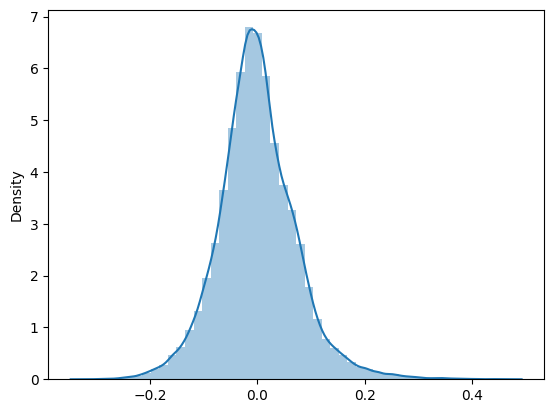

In [611]:
res = y_train - y_train_pred
sns.distplot(res)

In [612]:
y_test_pred = lr_model.predict(X_test_sm)

/var/folders/fc/k_p1s4pj2f70fysh__74y2l00000gn/T/ipykernel_92624/3457299234.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


<Axes: ylabel='Density'>

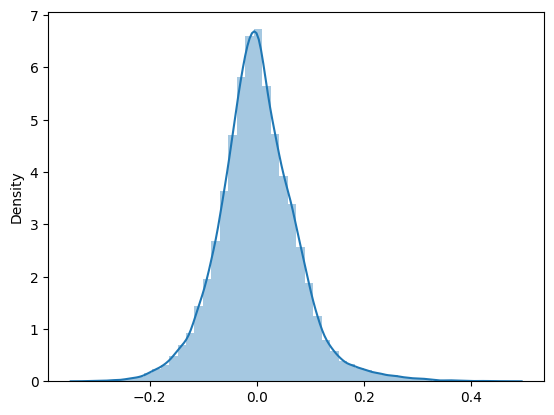

In [613]:
res = y_test - y_test_pred
sns.distplot(res)

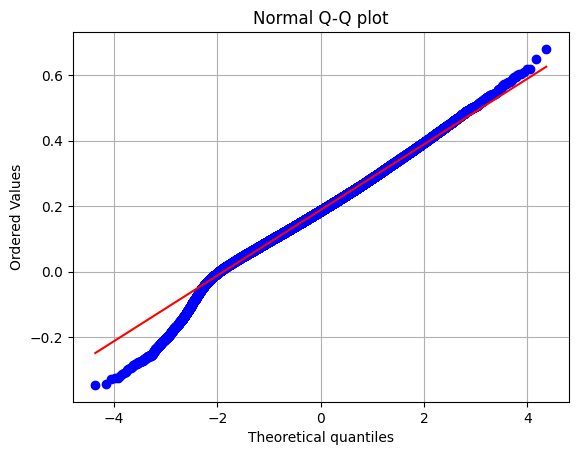

In [614]:
# Q-Q plot
stats.probplot(y_train_pred, dist="norm", plot=plt)
plt.title('Normal Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.grid(True)
plt.show()

[Your inferences here:]

Residulas are normally distributed in both train and test sets.

#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [615]:
# Compare the scaled vs unscaled features used in the final model

#Unscaled coeffs

#const                       32.981639
#total_items                 -0.281600
#subtotal                     0.001686
#total_busy_dashers          -0.359461
#total_outstanding_orders     0.247032
#distance                     0.471767
#hour                        -0.203200

#Scaled coeffs 

#const                       0.017797
#total_busy_dashers         -0.709222
#total_outstanding_orders    0.680876
#distance                    0.323421
#total_items                 0.010498
#subtotal                    0.153745
#hour                       -0.068081


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [616]:
# Analyze the effect of a unit change in a feature, say 'total_items'

#Unscaled Coeffs
# For a unit change in total_items, there will will be 0.2 unit decrease 

#Scaled Coeffs
# For a unit change in total_items, there will will be 0.01 unit increase

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>There are no Categorical Variables. They don't have significant effect on the dependent variable.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> It means the data is split into 80% training data and 20% test data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>'distance' is having highest correlation with the target variable.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Used boxplot initially to visualize the outliers. Later removed them finding lower bound and upper bound with the help of IQR range.



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on VIF ranking for the final model, distance, total_items and sub_total are the top 3 features significantly affecting the delivery time.



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> The dataset is first split into (70,30) or (80,20) training and test datasets.
> The selected features from the training data are passed to the model to fit into it.
> Model learns the coefficients from this data, calculates r2, p value etc.
> Now test data is fit into the model and it starts predicting.
> The difference between actual and predicted (residue) and the residual plots helps to understand the distribution of error terms.
> Error terms should be independent of each other and mean is 0.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> Simple Linear regression is used when the target variable is dependent on one independent variable.
> Multiple Linear regression is used when there are more than one independent variables.
> Both models work effectively when there is linear relationship.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>Cost function helps to find the differnce between predicted values and actual values. Gradient descent algorithm can be used to minimize it.



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> Overfitting is the case when the model memorizes all data points.
> Underfitting is the case when the model does not consider the significant features and fail to perform well.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots help in visualizing the distribution of error terms.
> Helps to check the requirement of linear model that the mean of error terms is 0 .
> Also the error terms should be independent of each other and there should not be any patterns.